<a href="https://colab.research.google.com/github/kishiyamat/la-kentei-yaminabe/blob/main/notebooks/mtg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 言語学からみるMTG

画像が文字化けするので、treeを画像として埋め込んでいます。
オリジナルのノートブックは以下のものになります。
https://github.com/kishiyamat/la-kentei-yaminabe/blob/main/notebooks/mtg-original.ipynb

## 前準備

In [1]:
! pip install svgling  # for depicting syntax tree in nltk module

In [2]:
import nltk
def padding_leaves(tree: nltk.Tree, padding_str: str):
    """
    tree: 葉ノードをパディングしたい木
    padding_str: この入力で葉をパディングする
    """
    for idx, leaves in enumerate(tree.leaves()):
        tree_location = tree.leaf_treeposition(idx)
        leaves_len = int(len(leaves)/2)
        tree[tree_location] =  padding_str*leaves_len + leaves + padding_str*leaves_len
    return tree

## 文の埋め込み

In [3]:
# かき混ぜを考慮したルールの集合
grammar_mtg_en = nltk.CFG.fromstring("\n".join([
    "能力 -> 時 ',' 効果",
    "効果 -> 動詞 名詞句",
    "名詞句 -> 名詞句 修飾",
    "修飾 -> 'with' 能力",
    "時 -> 'When' 名詞句 動詞",
    "名詞句 -> 'Reef_Worm' | 'a_fish_token' |  'a_whale_token' | 'a_kraken_token' | 'this_creature'",
    "動詞 -> 'dies' | 'create'",
    ]))
sent = """
When Reef_Worm dies , create a_fish_token
    with When this_creature dies , create a_whale_token
    with When this_creature dies , create a_kraken_token
""".split()
parser = nltk.ChartParser(grammar_mtg_en)
trees = list(parser.parse(sent))
# GitHub上では文字化けするのでコメントアウト
# trees[1]  # 0は別の構造になっている

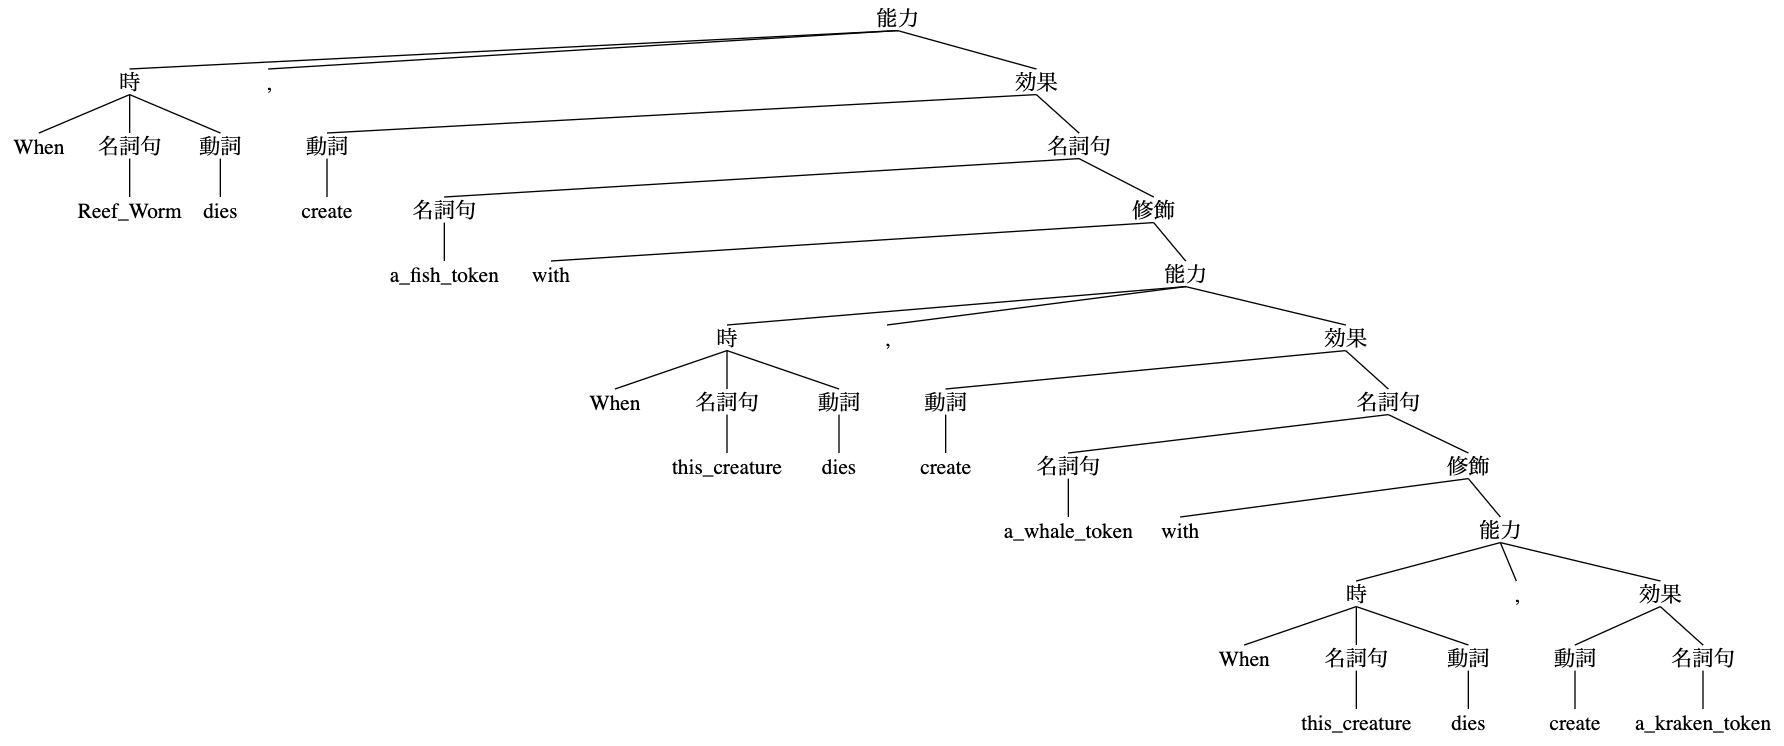

In [4]:
sent = """
When Reef_Worm dies , create a_fish_token
    with When this_creature dies , create a_whale_token
""".split()
parser = nltk.ChartParser(grammar_mtg_en)
trees = list(parser.parse(sent))
# GitHub上では文字化けするのでコメントアウト
# trees[0]  # 0は別の構造になっている

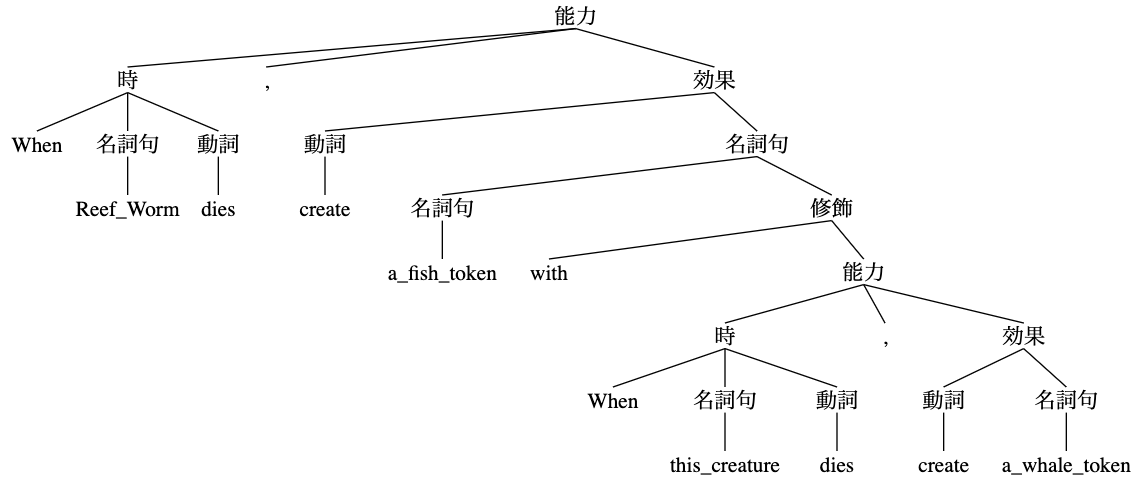

In [5]:
sent = "When Reef_Worm dies , create a_fish_token".split()
parser = nltk.ChartParser(grammar_mtg_en)
trees = list(parser.parse(sent))
# GitHub上では文字化けするのでコメントアウト
# trees[0]

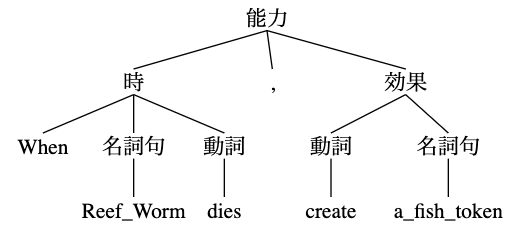

In [6]:
import nltk

grammar_mtg_jp = nltk.CFG.fromstring("\n".join([
    "能力 -> 時 '、' 効果",
    "効果 -> 名詞句 動詞",  # 逆
    "名詞句 -> 修飾 名詞句", # 逆
    "修飾 -> 能力 'を持つ'", # 逆
    "時 -> 名詞句 動詞 'とき'", # 逆
    "名詞句 -> '浅瀬蟲が' | '魚トークンを' |  '鯨トークンを' | 'クラーケントークンを' | 'このクリーチャーが'",
    "動詞 -> '死亡した' | '生成する'",
    ]))

sent = """
浅瀬蟲が 死亡した とき 、 このクリーチャーが 死亡した とき 、 このクリーチャーが 死亡した とき 、
クラーケントークンを 生成する を持つ 鯨トークンを 生成する を持つ 魚トークンを 生成する
""".split()
parser = nltk.ChartParser(grammar_mtg_jp)
trees = list(parser.parse(sent))
# GitHub上では文字化けするのでコメントアウト
# padding_leaves(trees[0], " ")

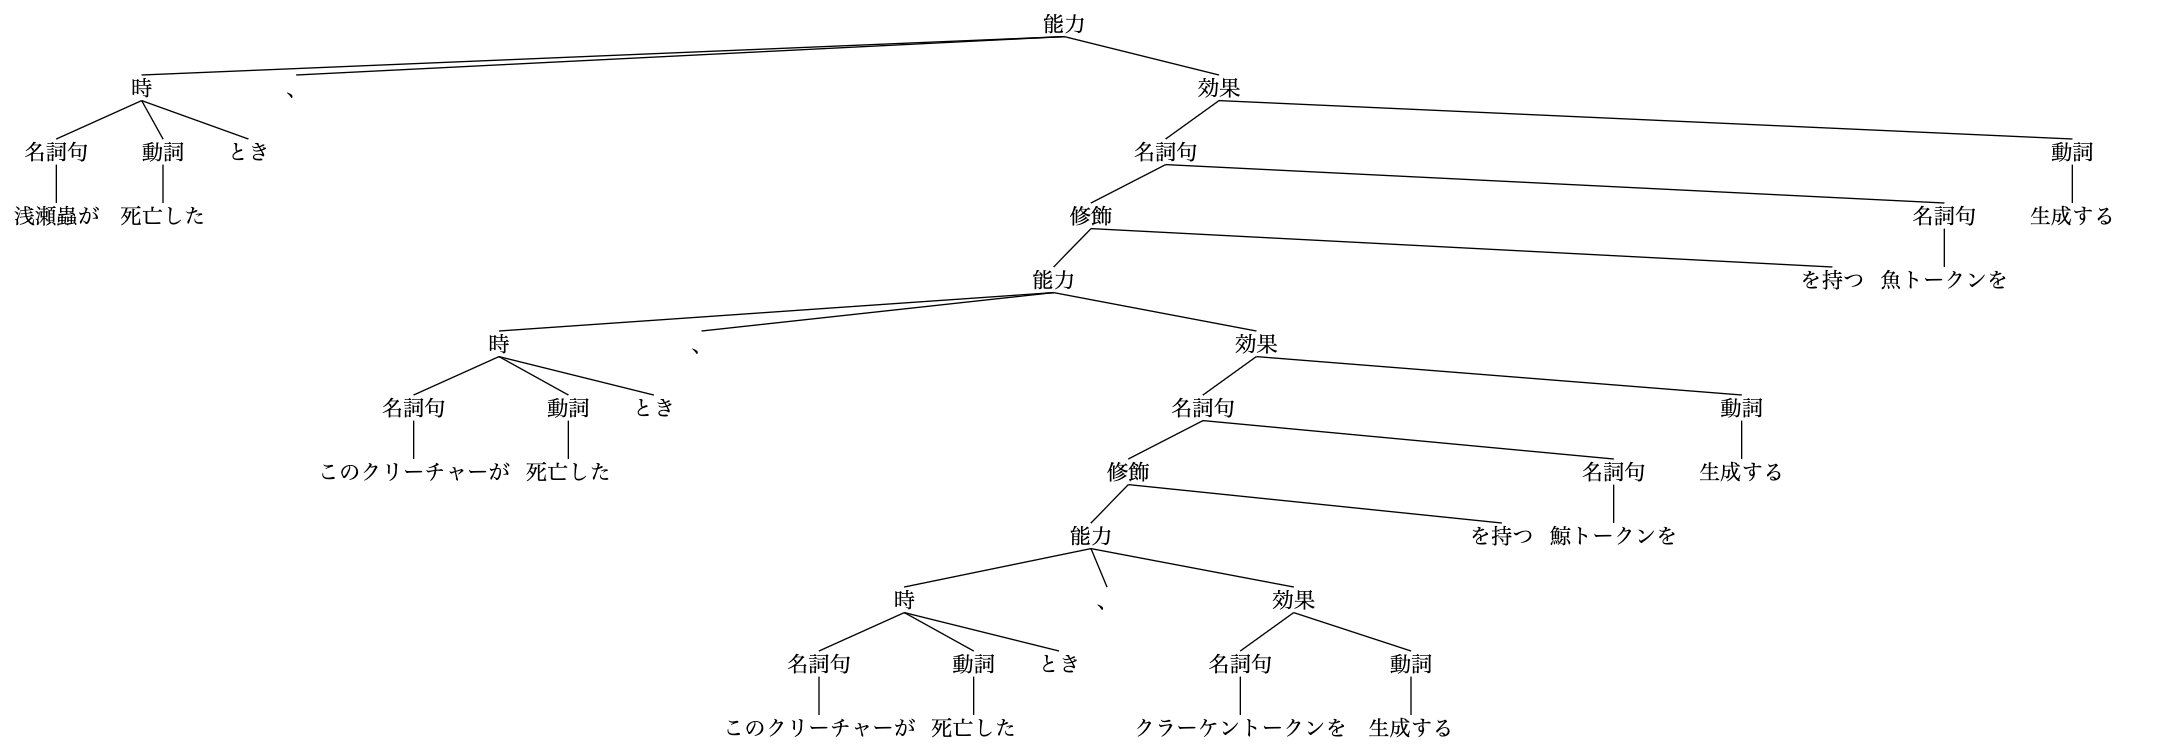

In [7]:
sent = """
浅瀬蟲が 死亡した とき 、 このクリーチャーが 死亡した とき 、
鯨トークンを 生成する を持つ 魚トークンを 生成する
""".split()
parser = nltk.ChartParser(grammar_mtg_jp)
trees = list(parser.parse(sent))
# GitHub上では文字化けするのでコメントアウト
# padding_leaves(trees[0], " ")

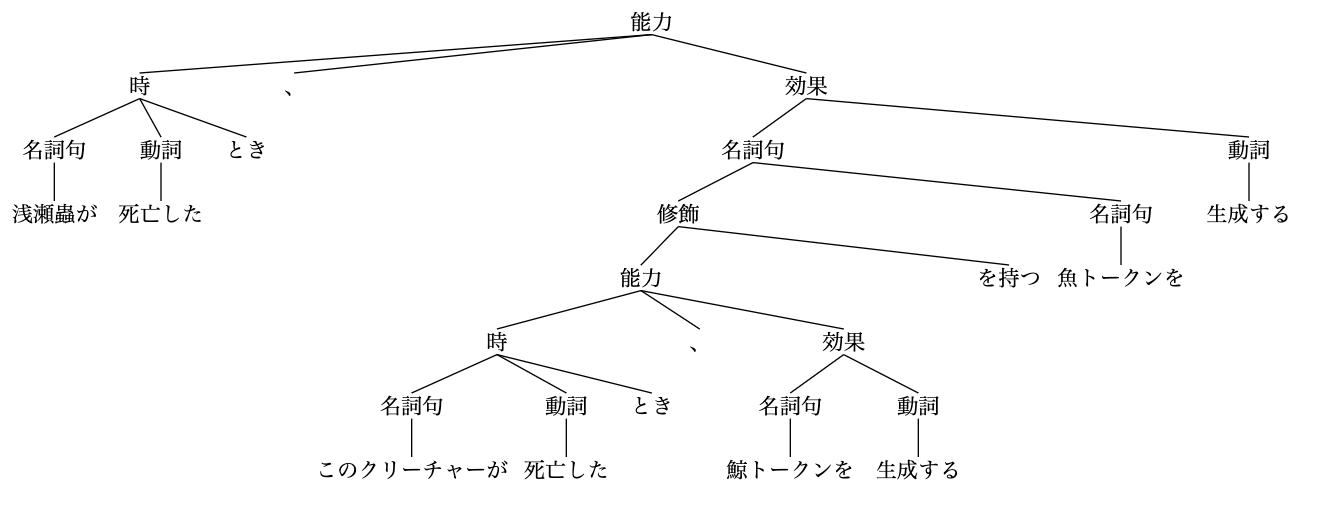

In [8]:
sent = """
浅瀬蟲が 死亡した とき 、 魚トークンを 生成する
""".split()
parser = nltk.ChartParser(grammar_mtg_jp)
trees = list(parser.parse(sent))
# GitHub上では文字化けするのでコメントアウト
# padding_leaves(trees[0], " ")

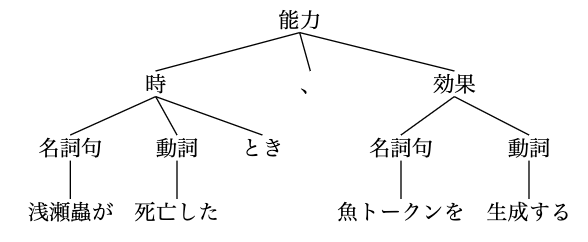

# 分かりやすい例にするための工夫

In [9]:
grammar_mtg_jp = nltk.CFG.fromstring("\n".join([
    "能力 -> 時 '、' 効果",
    "能力 -> 名詞句 時 動詞",  # 逆
    "効果 -> 名詞句 動詞",  # 逆
    "名詞句 -> 修飾 名詞句", # 逆
    "修飾 -> 能力 'を持つ'", # 逆
    "時 -> 名詞句 動詞 'とき'", # 逆
    "名詞句 -> '浅瀬蟲が' | '魚トークンを' |  '鯨トークンを' | 'クラーケントークンを' | 'このクリーチャーが'",
    "動詞 -> '死亡した' | '生成する'",
    ]))

sent = """
クラーケントークンを このクリーチャーが 死亡した とき 生成する を持つ 鯨トークンを このクリーチャーが 死亡した とき 生成する を持つ 魚トークンを 浅瀬蟲が 死亡した とき 生成する
""".split()
parser = nltk.ChartParser(grammar_mtg_jp)
trees = list(parser.parse(sent))
# GitHub上では文字化けするのでコメントアウト
# padding_leaves(trees[0], " ")

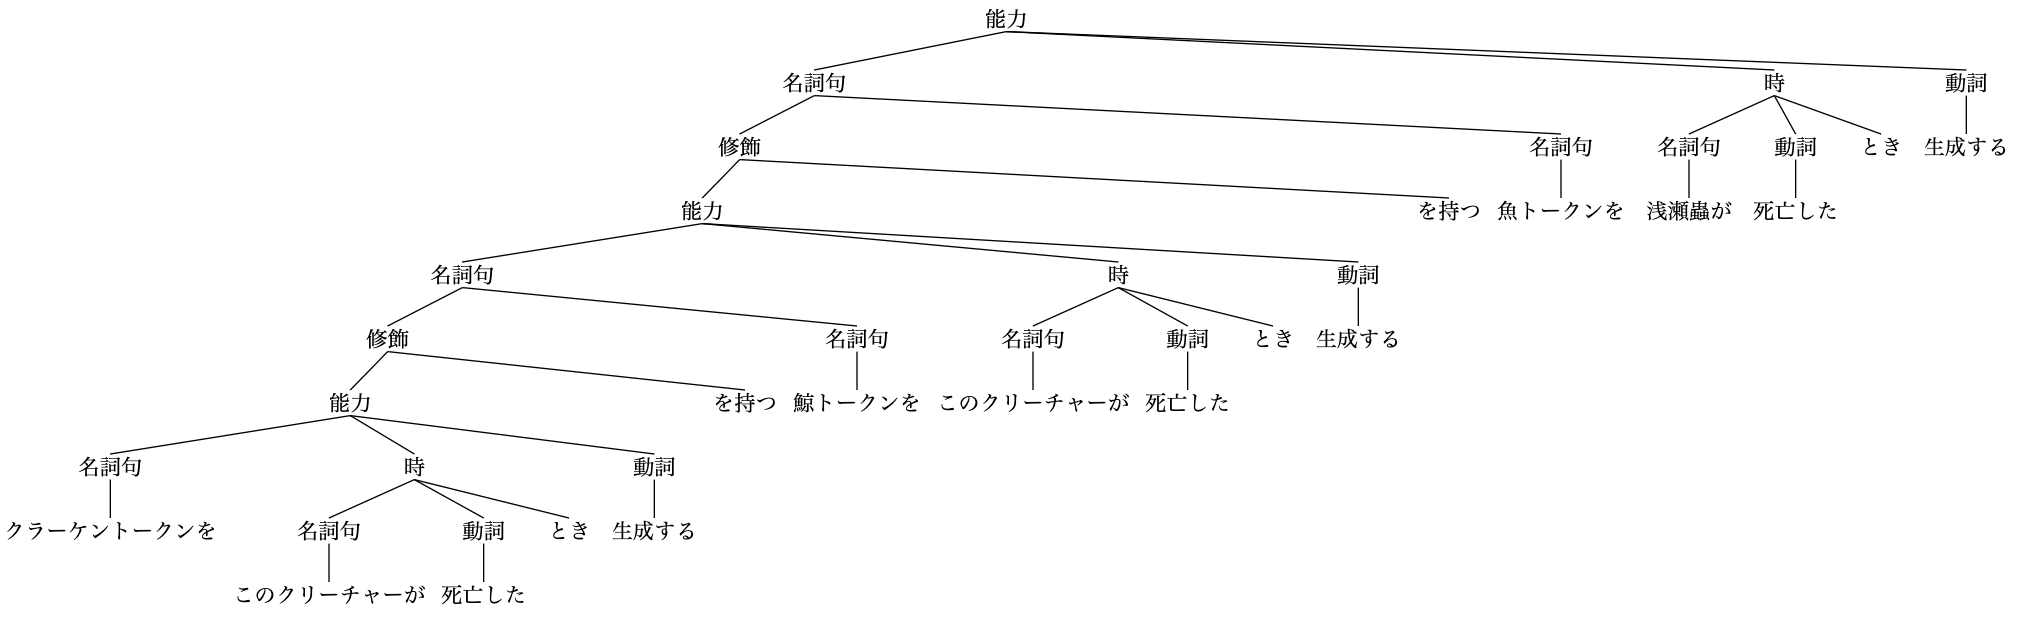